In [1]:
from operator import mod
import numpy as np
import pulse2percept as p2p
from matplotlib import pyplot as plt
from swarm_helpers import particle_swarm
from implant_helpers import build_implant

import pyswarms as ps
import pyswarms.backend as P
from pyswarms.backend.swarms import Swarm
from pyswarm import pso
import json

In [2]:
# Create model and implant
# %matplotlib inline

model = p2p.models.AxonMapModel(xrange= (-2.5, 2), yrange= (-2,2), xystep= 0.02, rho=75) 
model.build()

# Bounds 
bound_params = {
  'x': (-2500, 2000),
  'y': (-2000, 2000)
}
o_lb = [v[0] for v in bound_params.values()]
o_ub = [v[1] for v in bound_params.values()]
    
overlap_bounds = (o_lb, o_ub)


In [3]:
NUM_ITERATIONS = 5
NUM_PARTICLES = 2

data = open('data.json')
experiments = json.load(data)
data.close()

for num_electrodes in experiments:
    for electrode_size in experiments[num_electrodes]:
        for loss_func in experiments[num_electrodes][electrode_size]:
            
            print(f"---------Experiment---------")
            print(f"Number of Electrodes: {num_electrodes}\nElectrode Size: {electrode_size} microns\nLoss Function: {loss_func}")
            print(f"Number of Iterations: {NUM_ITERATIONS}\nNumber of Particles: {NUM_PARTICLES}")
            
            search_params = {}
            for electrode in range(int(num_electrodes)):
            
                search_params["x" + str(electrode)] = (-2500, 2000)
                search_params["y" + str(electrode)] = (-2000, 2000)

            lb = [v[0] for v in search_params.values()]
            ub = [v[1] for v in search_params.values()]

            bounds = (lb, ub)

            # Maximize number of effective electrodes
            best_positions, best_cost = particle_swarm(num_electrodes, electrode_size, NUM_PARTICLES, NUM_ITERATIONS, bounds, overlap_bounds, model, experiments, loss_func) 
            
            print(f"Best Cost: {best_cost}")
            print(f"----------------------------")
            print()


---------Experiment---------
Number of Electrodes: 20
Electrode Size: 100 microns
Loss Function: loss_func_too_close
Number of Iterations: 5
Number of Particles: 2
JSON Updated
Best Cost: 12.0
----------------------------
---------Experiment---------
Number of Electrodes: 20
Electrode Size: 100 microns
Loss Function: loss_func_too_far
Number of Iterations: 5
Number of Particles: 2


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<AxesSubplot:xlabel='x (microns)', ylabel='y (microns)'>

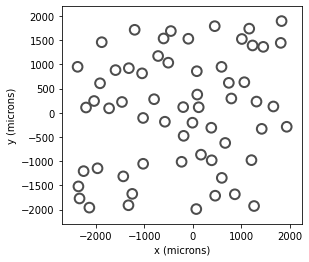

In [ ]:
best_implant = build_implant(best_positions)

best_implant.plot()
#model.plot()

# best_implant.stim = np.eye(best_implant.n_electrodes)
# model.predict_percept(best_implant).play()

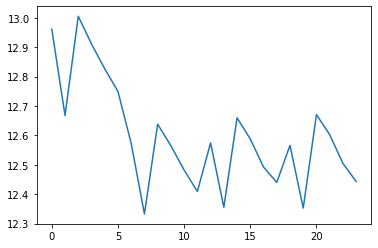

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train = np.load('val_loss_values.npy')

plt.plot(train)
plt.show()
# train